# Pandas Basics - Merge Dataset

a. Perform Merge and join operations for the datasets shared: state-abbrevs, state-areas, statepopulation
b. Perform the analysis and visualization on the merged data


Summary 
1. Import Libraries / Datasets to jupyter notebook.
    pandas, seaborn and matplotlib libraries are imported along with the required datasets.
2. Merging dataset (without renaming). 
    using pandas merge function we merge two datasets.
3. Merging dataset (after renaming).
    when two datasets donot have common column name. we have to manualy rename and thus we could make use of pandas merge function for merging the dataset.
4. Data Analysis on merged dataset
    Using pandas pivot table for data analysis, Here our aim is to derive insight from this data and pivottables could really help us in reshaping the dataset so that interpretation becomes much more easy.
5. Data Visualization on the merged dataset.
    Again pivottables could be helpfull for plotting the dataset, we just have to add plot command to the pivot table code snippet.

In [87]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
df1=pd.read_excel("Q5_0.xlsx")
df2=pd.read_excel("Q5_1.xlsx")
df3=pd.read_excel("Q5_2.xlsx")

In [52]:
df1.sample(5)

,state,abbreviation
31,Oregon,OR
39,Rhode Island,RI
47,Washington,WA
9,Florida,FL
5,Colorado,CO


In [53]:
df2.sample(5)

,state,area (sq. mi)
47,West Virginia,24231
21,Michigan,96810
40,South Dakota,77121
28,New Hampshire,9351
19,Maryland,12407


In [54]:
df3.sample(10)

,state/region,ages,year,population
776,KS,under18,2009,721841.0
713,IN,under18,1993,1473007.0
1618,NC,total,2008,9309449.0
2533,USA,under18,2008,74104602.0
1183,MS,under18,1997,774832.0
1469,NJ,under18,2000,2088885.0
2503,USA,under18,1993,67594938.0
959,ME,total,2012,1328501.0
306,CT,total,2003,3484336.0
362,DE,total,2004,830803.0


Explanation - Above code snippet allows us to get a view of the dataset, Sample function is more helpfull as the data set is ordered and sample will scramble the data and shows.

In [55]:
df=pd.merge(df1,df2,how='outer')
df.sample(5)

,state,abbreviation,area (sq. mi)
26,New York,NY,54475
39,Rhode Island,RI,1545
49,Wisconsin,WI,65503
6,Connecticut,CT,5544
18,Louisiana,LA,51843


Here we are merging two data frames df1 and df2 as both have a common column name called state. pandas merge function identifies this common column and merges them correctly

In [56]:
df3=df3.rename(index=str, columns={"state/region": "abbreviation"})

In [59]:
df_new=pd.merge(df3, df,how='outer')
df_new.sample(10)

,abbreviation,ages,year,population,state,area (sq. mi)
603,ID,under18,1999.0,366689.0,Idaho,83574.0
1461,NJ,under18,2004.0,2129051.0,New Jersey,8722.0
939,ME,under18,2004.0,294791.0,Maine,35387.0
2204,VT,under18,2011.0,126500.0,Vermont,9615.0
1267,MT,under18,2003.0,223012.0,Montana,147046.0
1282,MT,total,1995.0,876553.0,Montana,147046.0
1879,RI,total,1992.0,1012581.0,Rhode Island,1545.0
2029,TN,under18,2008.0,1494354.0,Tennessee,42146.0
2501,USA,total,1992.0,256514231.0,NaN,NaN
1598,NC,under18,1998.0,1894753.0,North Carolina,53821.0


Here we are merging two data frames df and df3, however no common columns is present hence we are required to rename the columns that are to be merged so that pandas could easily merge it accordingly.

In [100]:
df_new[df_new.ages=='total'][df_new.abbreviation!='USA'].sample(10)

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,abbreviation,ages,year,population,state,area (sq. mi)
2028,TN,total,2008.0,6247411.0,Tennessee,42146.0
2100,TX,total,2007.0,23831983.0,Texas,268601.0
1466,NJ,total,1999.0,8359592.0,New Jersey,8722.0
942,ME,total,2006.0,1323619.0,Maine,35387.0
502,GA,total,2001.0,8377038.0,Georgia,59441.0
1874,RI,total,1991.0,1010649.0,Rhode Island,1545.0
1823,OR,total,2012.0,3899801.0,Oregon,98386.0
65,AK,total,1997.0,612968.0,Alaska,656425.0
654,IL,total,2006.0,12643955.0,Illinois,57918.0
2399,WI,total,2012.0,5724554.0,Wisconsin,65503.0


Data Analysis of merged dataset, Here on analysis we realize that data set is not exactly in a easily interpretable form, hence we make your of filters to filter the total population, again we have USA population that gets added at the end this was again manualy removed.

In [106]:
pd.pivot_table(df_new[df_new.ages=='total'][df_new.abbreviation!='USA'],values='population',index='year',columns='abbreviation',aggfunc='sum')

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


abbreviation,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
year,,,,,,,,,,,,,,,,,,,,,
1990.0,553290.0,4050055.0,2356586.0,3684097.0,29959515.0,3307618.0,3291967.0,605321.0,669567.0,13033307.0,...,697101.0,4894492.0,17056755.0,1731223.0,6216884.0,564798.0,4903043.0,4904562.0,1792548.0,453690.0
1991.0,570193.0,4099156.0,2383144.0,3788576.0,30470736.0,3387119.0,3302895.0,600870.0,683080.0,13369798.0,...,703669.0,4966587.0,17398005.0,1779780.0,6301217.0,568606.0,5025624.0,4964343.0,1798735.0,459260.0
1992.0,588736.0,4154014.0,2415984.0,3915740.0,30974659.0,3495939.0,3300712.0,597567.0,694927.0,13650553.0,...,712801.0,5049742.0,17759738.0,1836799.0,6414307.0,572751.0,5160757.0,5025398.0,1806451.0,466251.0
1993.0,599434.0,4214202.0,2456303.0,4065440.0,31274928.0,3613734.0,3309175.0,595302.0,706378.0,13927185.0,...,722160.0,5137584.0,18161612.0,1898404.0,6509630.0,577748.0,5278842.0,5084889.0,1817539.0,473081.0
1994.0,603308.0,4260229.0,2494019.0,4245089.0,31484435.0,3724168.0,3316121.0,589240.0,717545.0,14239444.0,...,730790.0,5231438.0,18564062.0,1960446.0,6593139.0,583836.0,5375161.0,5133678.0,1820421.0,480283.0
1995.0,604412.0,4296800.0,2535399.0,4432499.0,31696582.0,3826653.0,3324144.0,580519.0,729735.0,14537875.0,...,737926.0,5326936.0,18958751.0,2014179.0,6670693.0,589003.0,5481027.0,5184836.0,1823700.0,485160.0
1996.0,608569.0,4331103.0,2572109.0,4586940.0,32018834.0,3919972.0,3336685.0,572379.0,740978.0,14853360.0,...,742214.0,5416643.0,19340342.0,2067976.0,6750884.0,593701.0,5569753.0,5229986.0,1822808.0,488167.0
1997.0,612968.0,4367935.0,2601091.0,4736990.0,32486010.0,4018293.0,3349348.0,567739.0,751487.0,15186304.0,...,744223.0,5499233.0,19740317.0,2119784.0,6829183.0,597239.0,5674747.0,5266213.0,1819113.0,489452.0
1998.0,619933.0,4404701.0,2626289.0,4883342.0,32987675.0,4116639.0,3365352.0,565232.0,763335.0,15486559.0,...,746059.0,5570045.0,20157531.0,2165961.0,6900918.0,600416.0,5769562.0,5297673.0,1815609.0,490787.0


So this is a much more useable and easily interpretable format of data that was made using pivot tables. 

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


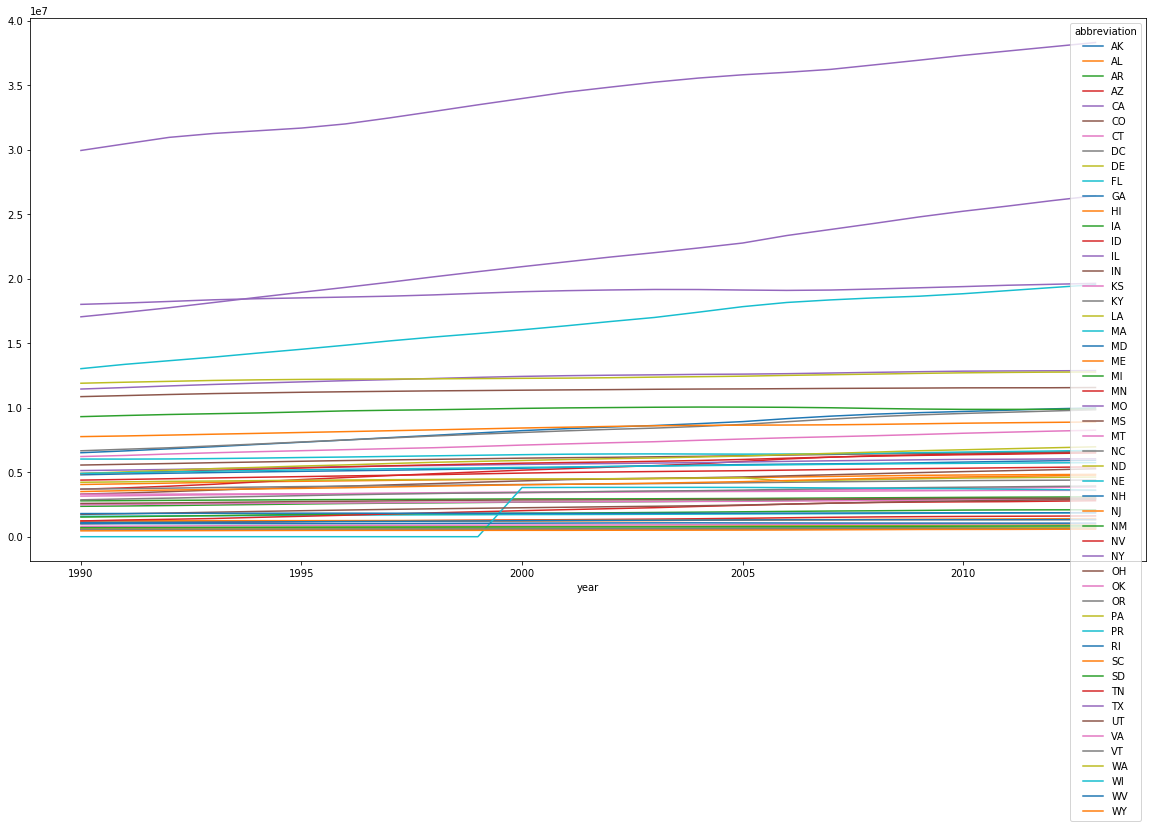

In [105]:
pd.pivot_table(df_new[df_new.ages=='total'][df_new.abbreviation!='USA'],values='population',index='year',columns='abbreviation',aggfunc='sum').plot(figsize=(20,10))

pivot tables really help us in visualizaing the dataset as shown above we just have to add one more method for converting dataframe to plot.